Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.

Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Check if there is missing values
missing = df.isnull().sum()

# Printing numbers of missing values in each column
print("Missing Values")
print(missing)

Missing Values
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


In [ ]:
# df = df.drop(columns=["Email No."])

In [ ]:
# Counting the number of duplicate rows
duplicates = df.duplicated().sum()
print("Duplicate rows = ", duplicates)

# Drop the duplicate rows and update the dataset
df.drop_duplicates(inplace=True)

# Verify there are no more duplicate records
assert df.duplicated().sum() == 0
print("No more duplicate records")

Duplicate rows =  0
No more duplicate records


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'Prediction' is your target variable
# X = df.drop('Prediction', axis=1)
# y = df['Prediction']
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

# Now you have X_train, X_test, y_train, and y_test for model training and evaluation.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


Optimal n (K): 12


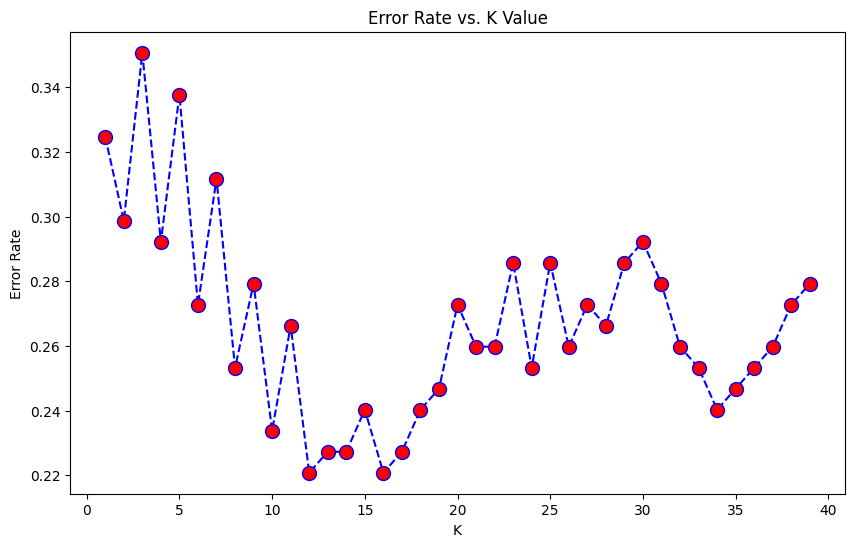

In [ ]:
# Create a list of error rates for different values of n
error_rates = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rates.append(np.mean(pred_i != y_test))

# Plot the error rates to visualize the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rates, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Determine the optimal value of n based on the elbow plot
optimal_n = error_rates.index(min(error_rates)) + 1

# Print the optimal n
print(f"Optimal n (K): {optimal_n}")

# Save the optimal n for later use
optimal_n = optimal_n

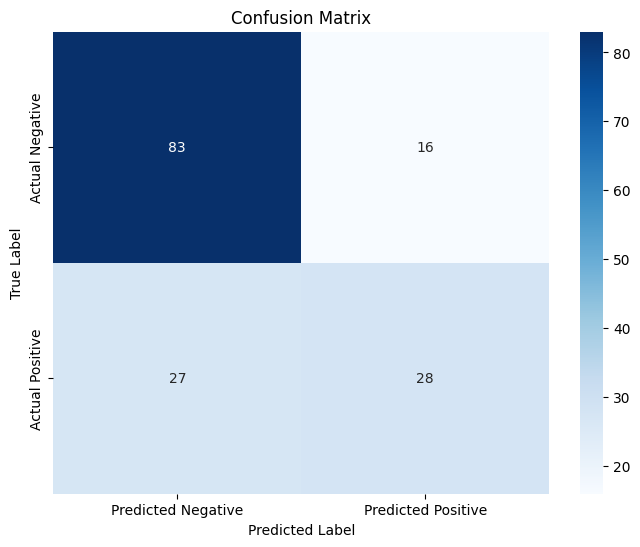

True Positive: 28
False Positive: 16
True Negative: 83
False Negative: 27
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        99
           1       0.64      0.51      0.57        55

    accuracy                           0.72       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154

Accuracy: 0.7207792207792207
Precision: 0.6363636363636364
Recall: 0.509090909090909
F1-score: 0.5656565656565656


In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN classifier with the optimal n
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_n)
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            # xticklabels=['Predicted 0', 'Predicted 1'],
            # yticklabels=['Actual 0', 'Actual 1'])
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print TP, FP, TN, FN
print("True Positive:", cm[1, 1])
print("False Positive:", cm[0, 1])
print("True Negative:", cm[0, 0])
print("False Negative:", cm[1, 0])


# Print the accuracy report
print(classification_report(y_test, y_pred))

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")